In [1]:
!pip install catboost
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


#machine learning Algorithms For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.4 MB/s eta 0:00:00


In [2]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)


{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [3]:
data = pd.concat([X, y], axis=1)

In [4]:
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<Figure size 1000x600 with 0 Axes>

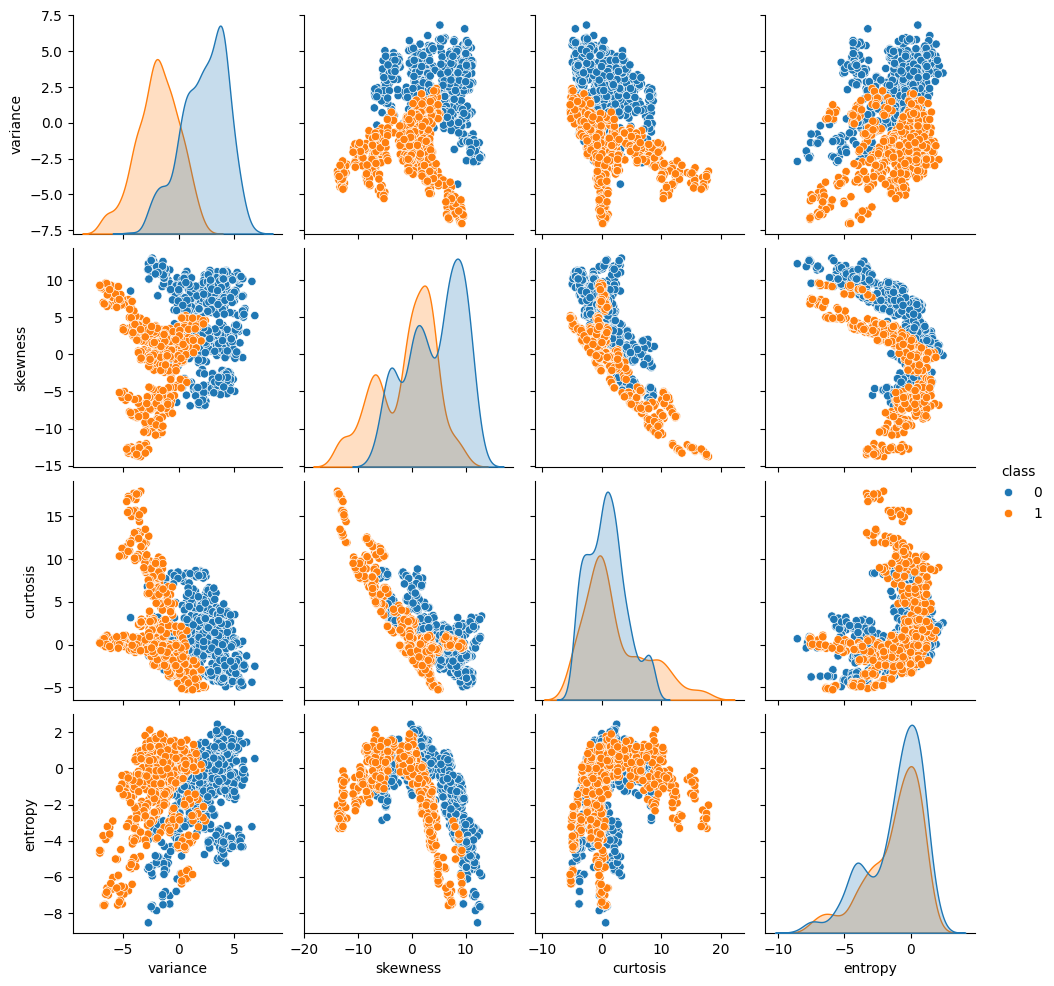

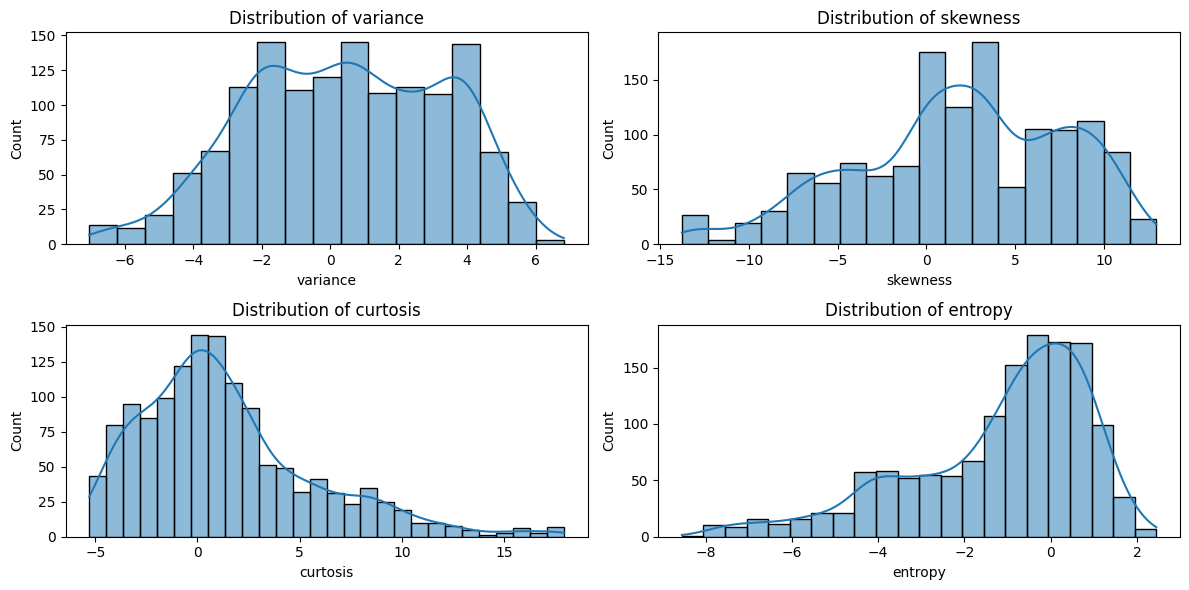

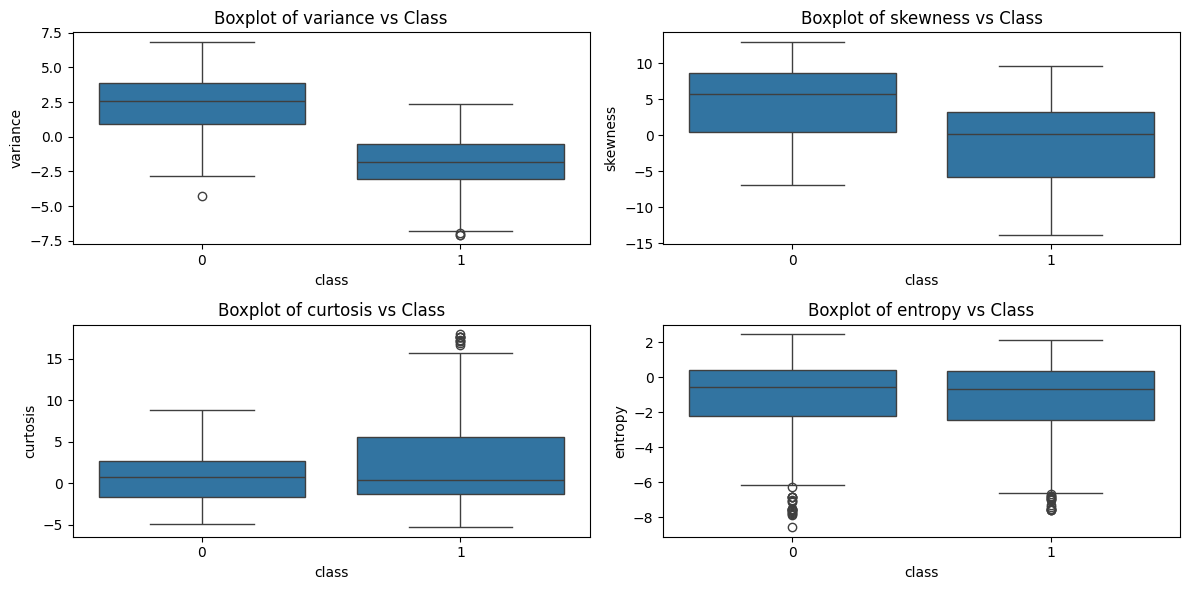

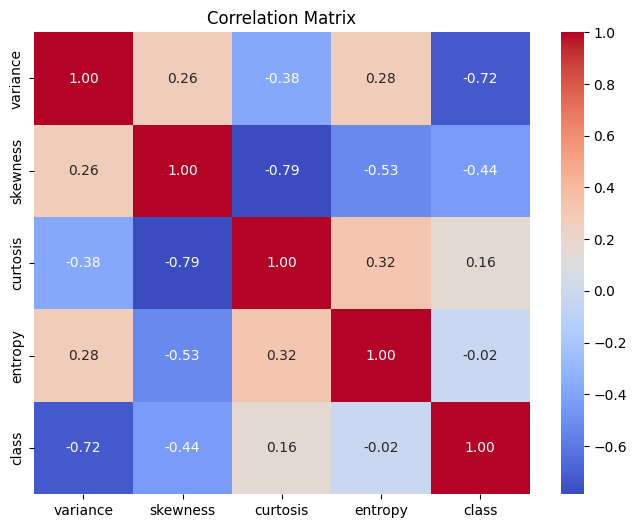

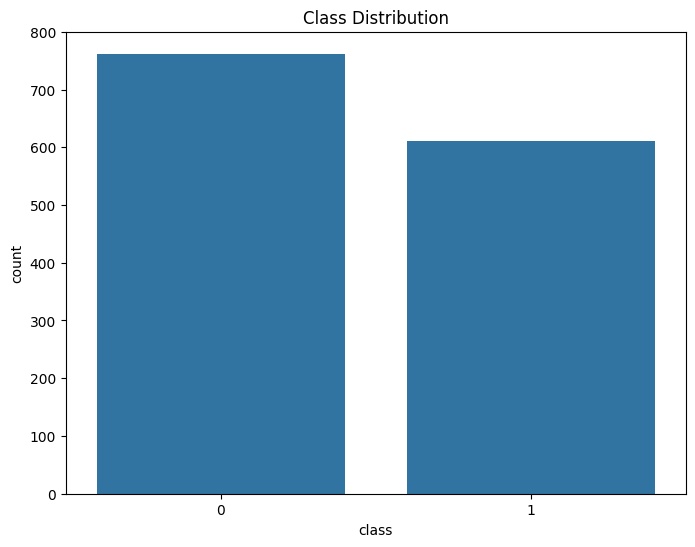

In [5]:

# Visualizations
plt.figure(figsize=(10, 6))
sns.pairplot(data, hue='class')
plt.show()

plt.figure(figsize=(12, 6))
for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='class', y=col, data=data)
    plt.title(f'Boxplot of {col} vs Class')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

In [6]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
scaler = MinMaxScaler()  # Use MinMaxScaler instead of StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [11]:
# Dictionary of classification algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Baye": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),  # Suppress LightGBM logs
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)

}


Training Logistic Regression...
Saved Logistic Regression model to trained_models/Logistic Regression.joblib
Logistic Regression Metrics:
Accuracy: 0.9600
Precision: 0.9602
Recall: 0.9600
F1 Score: 0.9600
----------------------------------------
Training Decision Tree...
Saved Decision Tree model to trained_models/Decision Tree.joblib
Decision Tree Metrics:
Accuracy: 0.9818
Precision: 0.9824
Recall: 0.9818
F1 Score: 0.9818
----------------------------------------
Training Extra Trees...
Saved Extra Trees model to trained_models/Extra Trees.joblib
Extra Trees Metrics:
Accuracy: 0.9927
Precision: 0.9927
Recall: 0.9927
F1 Score: 0.9927
----------------------------------------
Training Random Forest...
Saved Random Forest model to trained_models/Random Forest.joblib
Random Forest Metrics:
Accuracy: 0.9927
Precision: 0.9928
Recall: 0.9927
F1 Score: 0.9927
----------------------------------------
Training SVC...
Saved SVC model to trained_models/SVC.joblib
SVC Metrics:
Accuracy: 1.0000
Preci

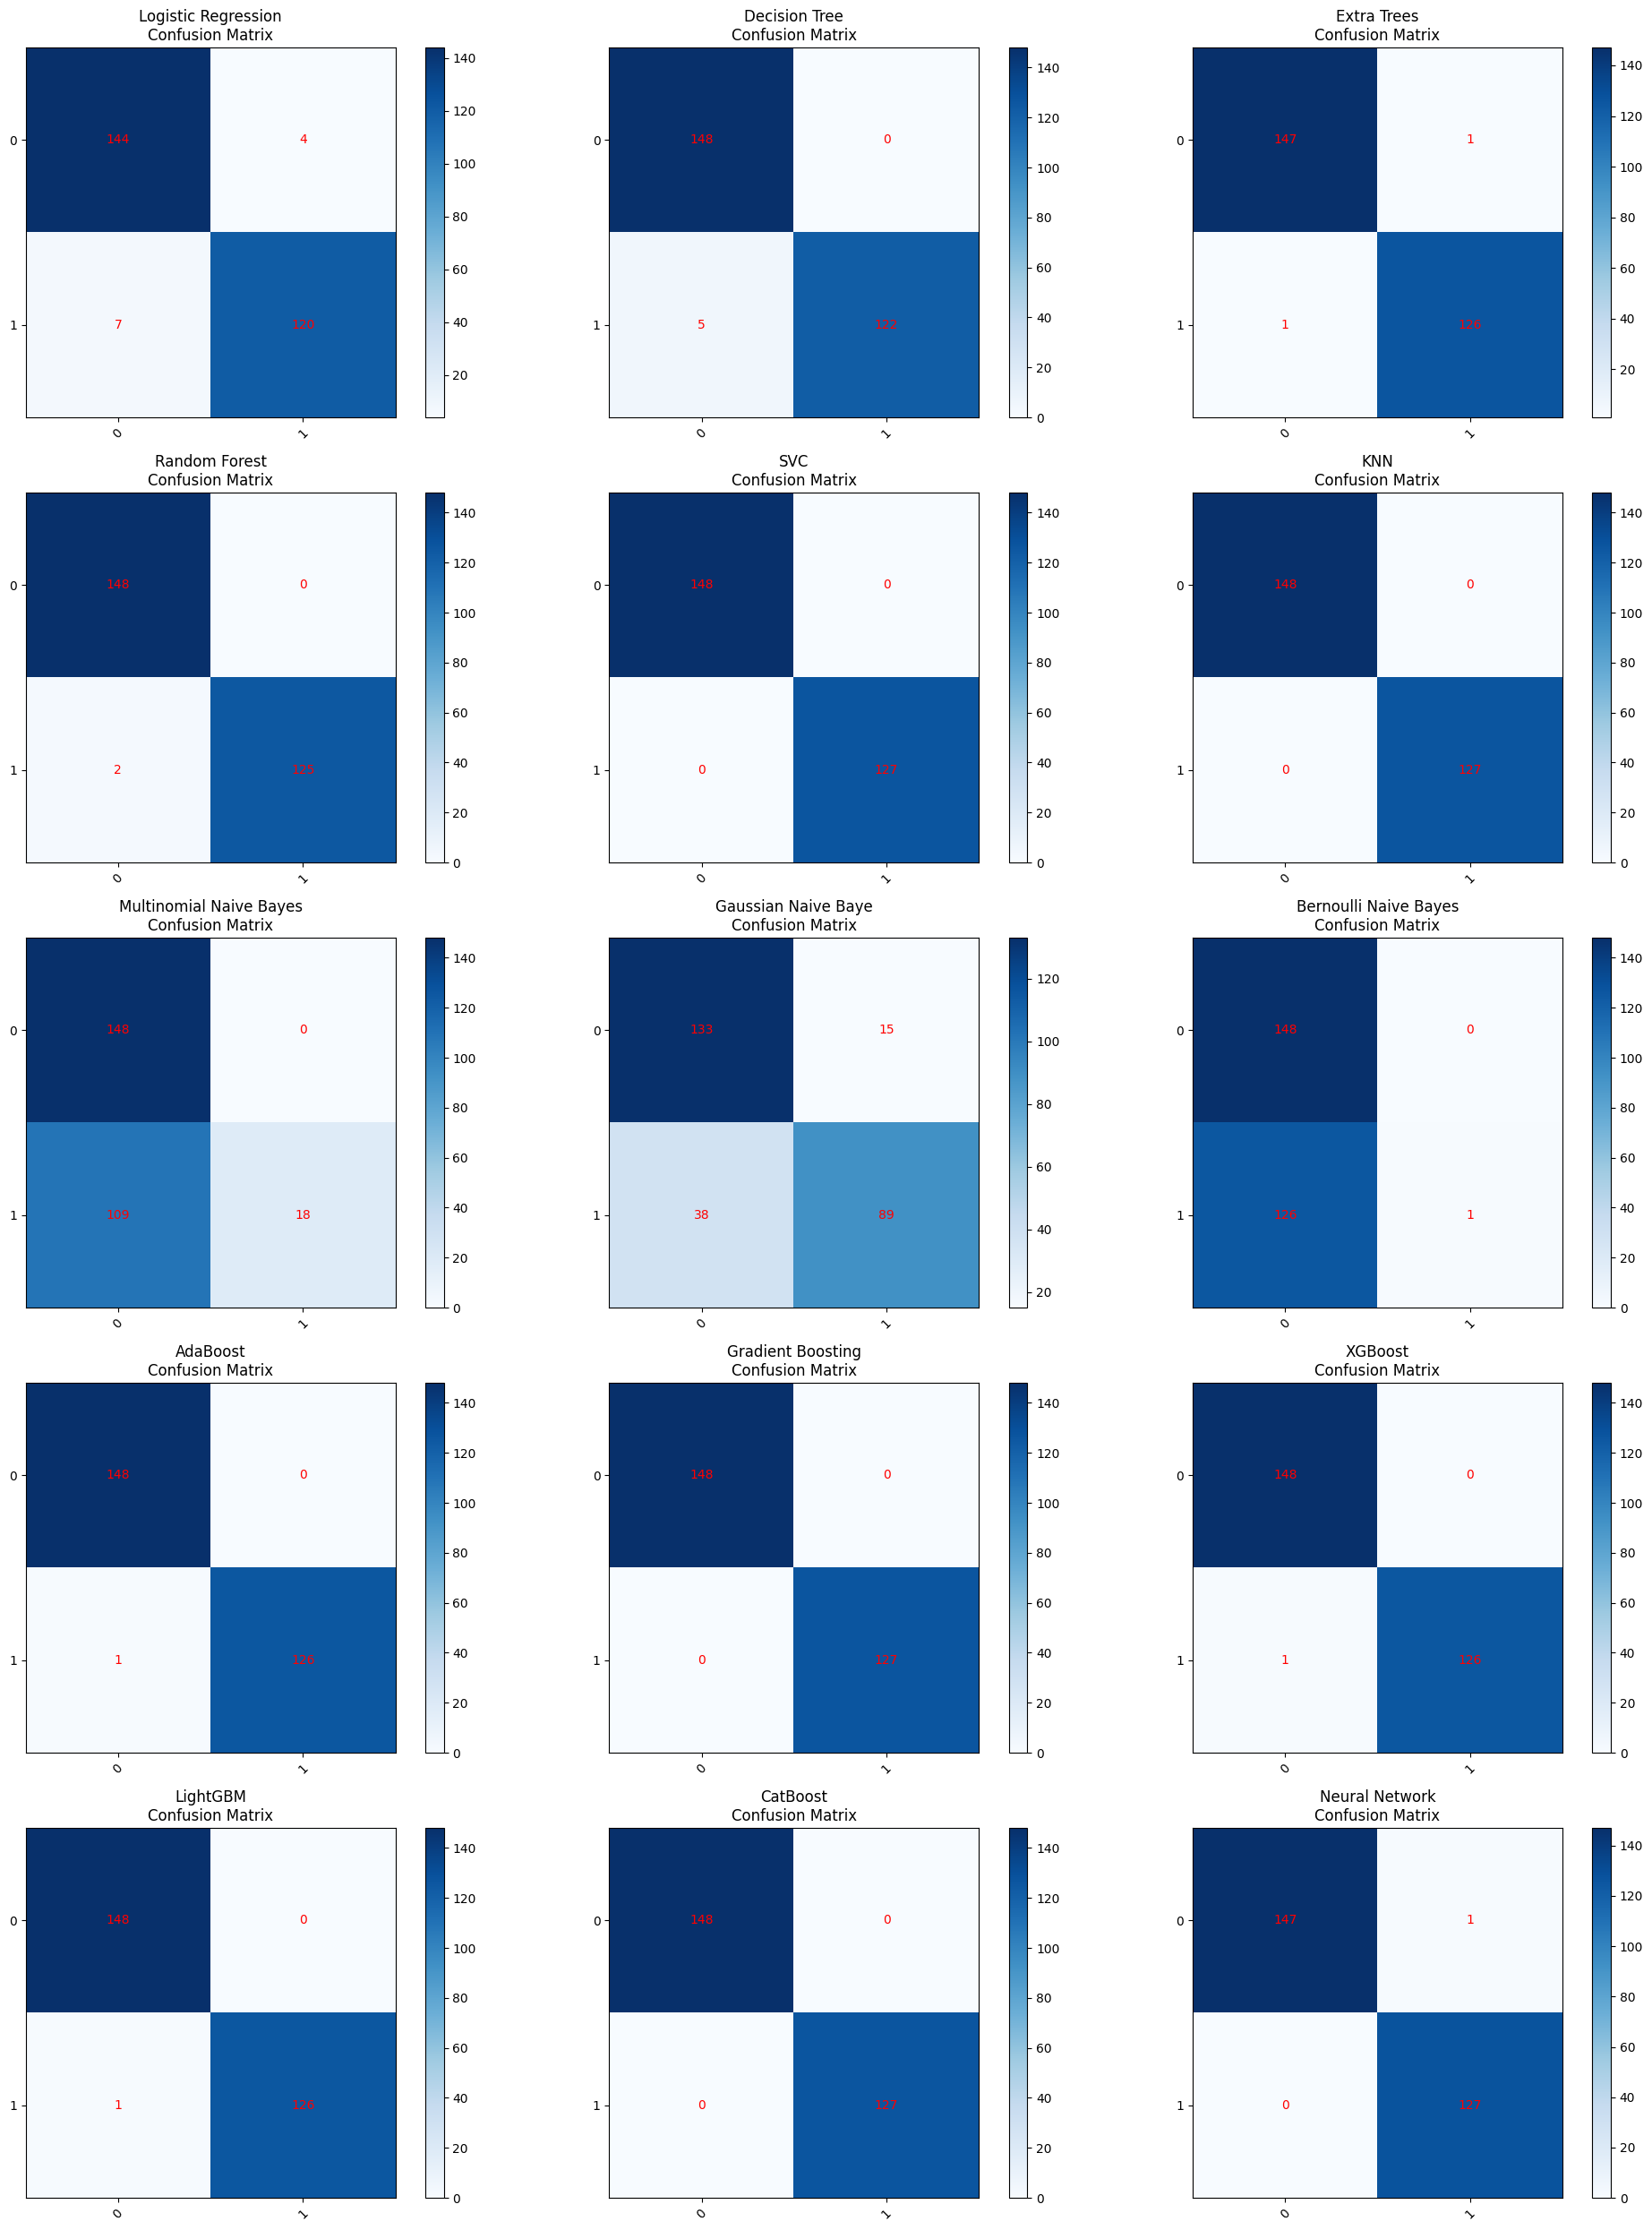

In [12]:
models_dir = 'trained_models'
os.makedirs(models_dir, exist_ok=True)

# Initialize a figure for confusion matrices
num_classifiers = len(classifiers)
num_rows = int(np.ceil(num_classifiers / 3))  # Adjust columns as needed
num_cols = 3  # You can adjust this for a different layout

# Initialize a figure with enough subplots
plt.figure(figsize=(20, num_rows * 5))  # Adjust figure height dynamically

# Dictionary to store results for all models
results = {}

# Train and evaluate each classifier
for i, (name, model) in enumerate(classifiers.items()):
    print(f"Training {name}...")


    y_train_adjusted = y_train
    y_test_adjusted = y_test

    # Fit the model
    model.fit(X_train, y_train_adjusted)

    # Save the trained model
    model_filename = os.path.join(models_dir, f"{name}.joblib")
    joblib.dump(model, model_filename)
    print(f"Saved {name} model to {model_filename}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test_adjusted, y_pred)
    precision = precision_score(y_test_adjusted, y_pred, average='weighted')
    recall = recall_score(y_test_adjusted, y_pred, average='weighted')
    f1 = f1_score(y_test_adjusted, y_pred, average='weighted')

    # Store metrics in the results dictionary
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": confusion_matrix(y_test_adjusted, y_pred)
    }

    # Print metrics
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix in a subplot
    cm = results[name]["confusion_matrix"]
    plt.subplot(num_rows, num_cols, i + 1)  # Use calculated rows and columns
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name}\nConfusion Matrix")
    plt.colorbar()

    # Get the number of unique classes in the target variable
    num_classes = len(np.unique(y_test_adjusted))

    tick_marks = np.arange(num_classes)  # Use num_classes instead of hardcoding 7
    plt.xticks(tick_marks, np.unique(y_test_adjusted), rotation=45)  # Use unique class labels
    plt.yticks(tick_marks, np.unique(y_test_adjusted))  # Use unique class labels

    # Labeling the matrix - adjust loop ranges
    for j in range(cm.shape[0]):  # Iterate over actual classes (rows)
        for k in range(cm.shape[1]):  # Iterate over predicted classes (columns)
            plt.text(k, j, format(cm[j, k], 'd'), ha="center", va="center", color="red")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

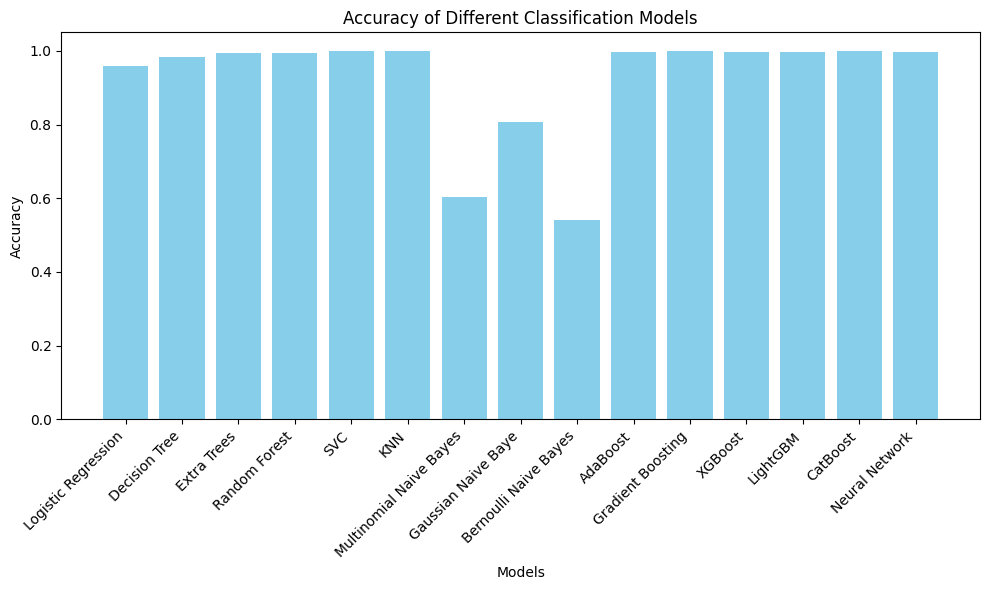

In [13]:

model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classification Models")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

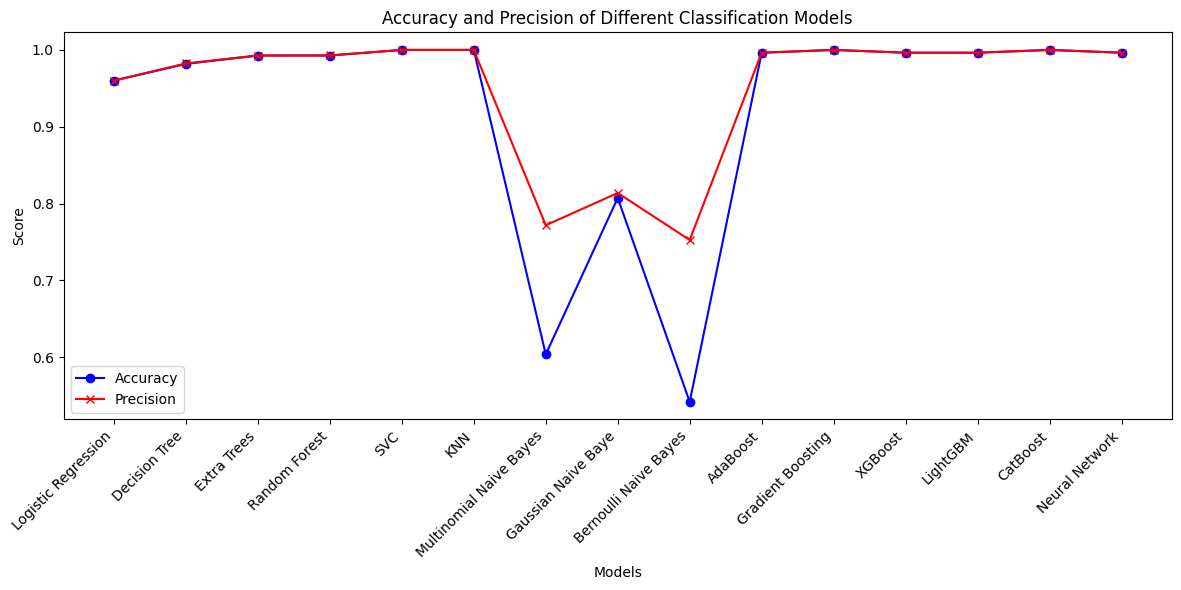

In [14]:


# Assuming 'results' dictionary is already populated from the previous code
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
precisions = [results[model]['precision'] for model in model_names]

plt.figure(figsize=(12, 6))

# Plot accuracies
plt.plot(model_names, accuracies, marker='o', label='Accuracy', color='blue')

# Plot precisions
plt.plot(model_names, precisions, marker='x', label='Precision', color='red')


plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Accuracy and Precision of Different Classification Models")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:

# Load the scaler
scaler = joblib.load('scaler.pkl')

# New record (replace with your actual data)
new_record = np.array([[2.0, 3.0, 4.0, 1.0]])

# Preprocess the new record using the loaded scaler
new_record_scaled = scaler.transform(new_record)

# Directory containing the saved models
models_dir = 'trained_models'

# Load all saved models and make predictions
predictions = {}
for filename in os.listdir(models_dir):
    if filename.endswith('.joblib'):
        model_name = filename[:-7]  # Remove the ".joblib" extension
        model_path = os.path.join(models_dir, filename)
        model = joblib.load(model_path)
        prediction = model.predict(new_record_scaled)
        predictions[model_name] = prediction[0]

# Print the predictions for each model
for model_name, prediction in predictions.items():
    print(f"Model: {model_name}, Prediction: {prediction}")

Model: Gaussian Naive Baye, Prediction: 0
Model: LightGBM, Prediction: 0
Model: AdaBoost, Prediction: 0
Model: Multinomial Naive Bayes, Prediction: 0
Model: KNN, Prediction: 0
Model: Random Forest, Prediction: 0
Model: Bernoulli Naive Bayes, Prediction: 0
Model: Extra Trees, Prediction: 0
Model: SVC, Prediction: 1
Model: Logistic Regression, Prediction: 0
Model: Neural Network, Prediction: 0
Model: XGBoost, Prediction: 0
Model: Decision Tree, Prediction: 0
Model: CatBoost, Prediction: 0
Model: Gradient Boosting, Prediction: 0
